# 10. Hafta Lab-5: TF-IDF Zararlı Yazılım Sınıflandırma
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
### İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
#### Dr. Ferhat Özgür Çatak
Bu lab çalışması kapsamında zararlı yazılımların (malware) API çağırımlarının **tf-idf** matrisi ile sınıflandırma modeli oluşturulacaktır. *Malware Classification*

In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
fields = ["label", "api_call"]
D = pd.read_csv("02-CSDMC_API_Train.zip", names=fields, compression="zip")
D = shuffle(D)
D.head(10)

,label,api_call
33,1,LoadLibraryW HeapAlloc HeapAlloc HeapFree Heap...
46,1,GetCurrentThreadId GetCurrentThreadId HeapAllo...
120,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
84,1,LocalAlloc HeapAlloc HeapFree HeapAlloc HeapAl...
379,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
4,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
27,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
123,0,LocalAlloc IsBadReadPtr IsBadReadPtr IsBadRead...
224,1,LoadLibraryW HeapAlloc HeapAlloc HeapFree Heap...
110,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...


### Veri kümesi hazırlığı
Sınıf etiketleri için dataframe *D* içinde yer alan *label* kolonu kullanılacaktır. *text* olarak **api_call** kolonu kullanılacaktır.

In [3]:
y = D["label"].as_matrix()

tfidf_transformer = TfidfVectorizer()
X = tfidf_transformer.fit_transform(D["api_call"]).todense()

c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [4]:
print(X.shape)
print(type(X))
df = pd.DataFrame(X, columns=None)
df.describe()
df.head(10)

(388, 313)
<class 'numpy.matrix'>


,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.000000,0.0,0.000000,0.001656,0.0,0.0,0.35162,0.0,0.370584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012075,0.0,0.009129,0.0,0.004781
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.001921,0.0,0.001979,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(2000, activation='tanh', kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(1000, input_dim=X_train.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_3 (Dropout)  

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, verbose=1,
                    validation_split=0.2 )

Instructions for updating:
Use tf.cast instead.
Train on 216 samples, validate on 55 samples
Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 0.6985 - acc: 0.3981 - val_loss: 0.6052 - val_acc: 0.7455
Epoch 2/50
216/216 [==============================] - 0s 337us/step - loss: 0.4257 - acc: 0.8519 - val_loss: 0.7957 - val_acc: 0.7455
Epoch 3/50
216/216 [==============================] - 0s 342us/step - loss: 0.4370 - acc: 0.8565 - val_loss: 0.6938 - val_acc: 0.7636
Epoch 4/50
216/216 [==============================] - 0s 337us/step - loss: 0.3816 - acc: 0.8657 - val_loss: 0.5091 - val_acc: 0.8000
Epoch 5/50
216/216 [==============================] - 0s 360us/step - loss: 0.3488 - acc: 0.9074 - val_loss: 0.4947 - val_acc: 0.8000
Epoch 6/50
216/216 [==============================] - 0s 356us/step - loss: 0.3192 - acc: 0.9074 - val_loss: 0.6033 - val_acc: 0.8000
Epoch 7/50
216/216 [==============================] - 0s 346us/step - loss: 0.2917 - acc: 0.9074 - val_lo

In [8]:
y_hat = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_hat)
cm

array([[18,  4],
       [ 1, 94]], dtype=int64)

### Tarihçe

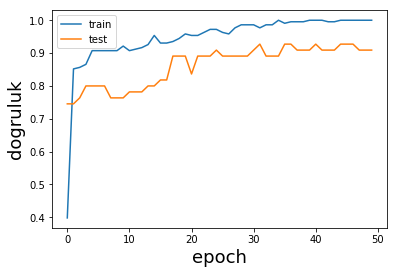

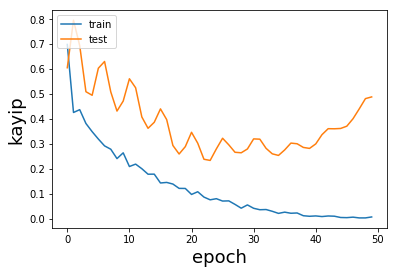

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()